In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load the data

red_wine_data = pd.read_csv('winequality-red.csv', sep = ';')

In [6]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red_wine_data.shape

(1599, 12)

### Observations:<br>
1- Dataset comprises 1599 observations(rows) and 12 features(columns).<br>
2- Out of the 12, one is the target variable and rest 11 are input variables.

In [9]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observations:**

Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column.This signifies the presence of Outliers. For example, a data set includes values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data (30.5), is greatly affected by the extreme data point(2). 
There is notably a large difference between 75th %tile and max values of predictors “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values( up to 75th %tile) 
Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset. 

In [10]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

**Observations:**<br>
Few key insights just by looking at the target variable are as follows:<br>

Target variable/Dependent variable is discrete and categorical in nature.<br>
“quality” score scale ranges from 1 to 10; 1 being poor and 10 being the best.<br>
1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

In [12]:
#Frequency Counts of each Quality Value

red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

**Observations:**<br>
This tells us the vote count of each quality score in descending order.<br>
“quality” has most values concentrated in the categories 5, 6 and 7.<br>
Only a few observations made for the categories 3 & 8.

In [15]:
red_wine_data.rename(columns = {'fixed acidity' : 'fixed_acidity','citric acid':'citric_acid' 
                     ,'volatile acidity' : 'volatile_acidity', 'residual sugar': 'residual_sugar',
                    'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, inplace = True)

In [16]:
red_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Observation:** There are no missing values.

In [17]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observation:**<br>
1- Data has only float values.
2- No missing value.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

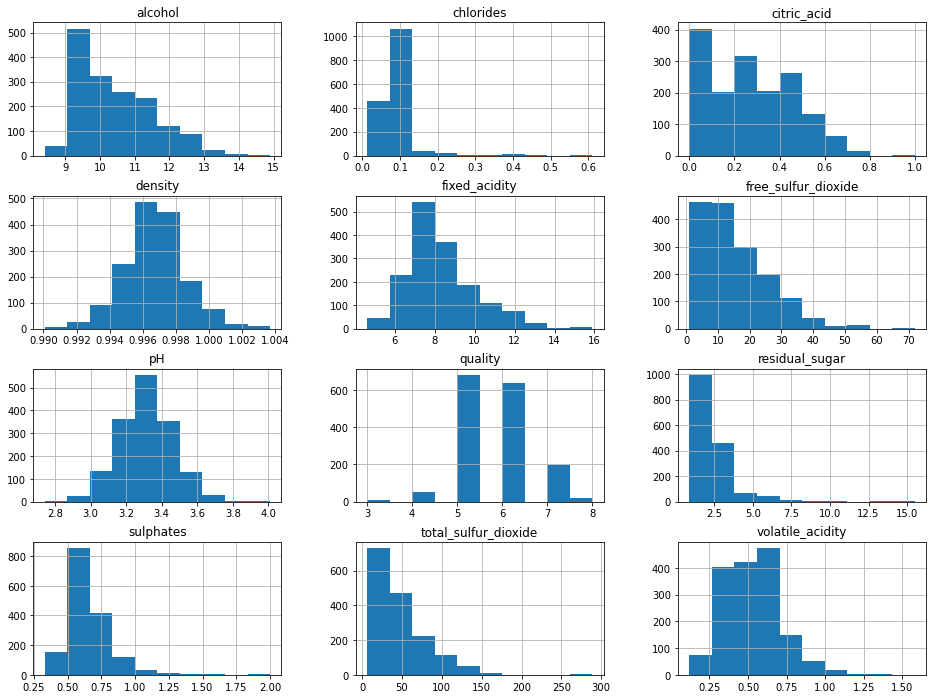

In [19]:
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

Observations:
The distribution of the attribute “alcohol” seems to be positively skewed i.e the curve is shifted towards the left.
The attributes 'density' and 'pH' are quite normally distributed.
Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

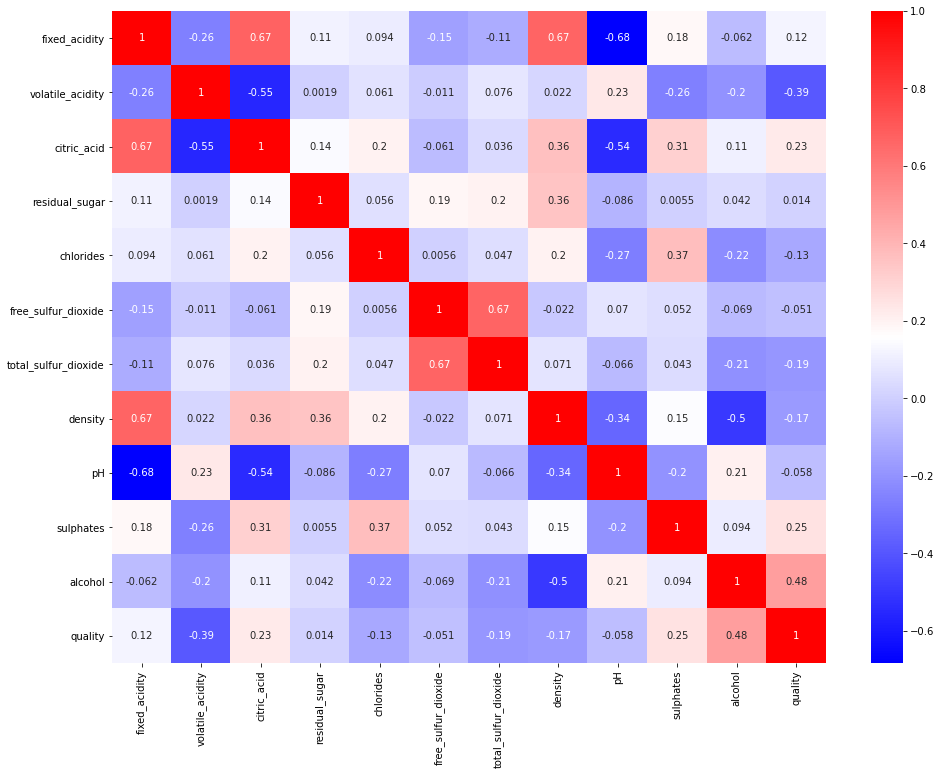

In [22]:
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(), cmap = 'bwr', annot = True)

Observations:<br>
Alcohol has the highest positive correlation with wine quality, followed by the various other variables such as acidity, sulphates, density & chlorides.<br>
There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.<br>
There is a relatively high negative correlation between fixed_acidity and pH.<br>
Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.<br>
citric acid & volatile acidity have negative correlation.<br>
free sulphur dioxide & total sulphur dioxide have positive correlation.

<Figure size 1152x864 with 0 Axes>

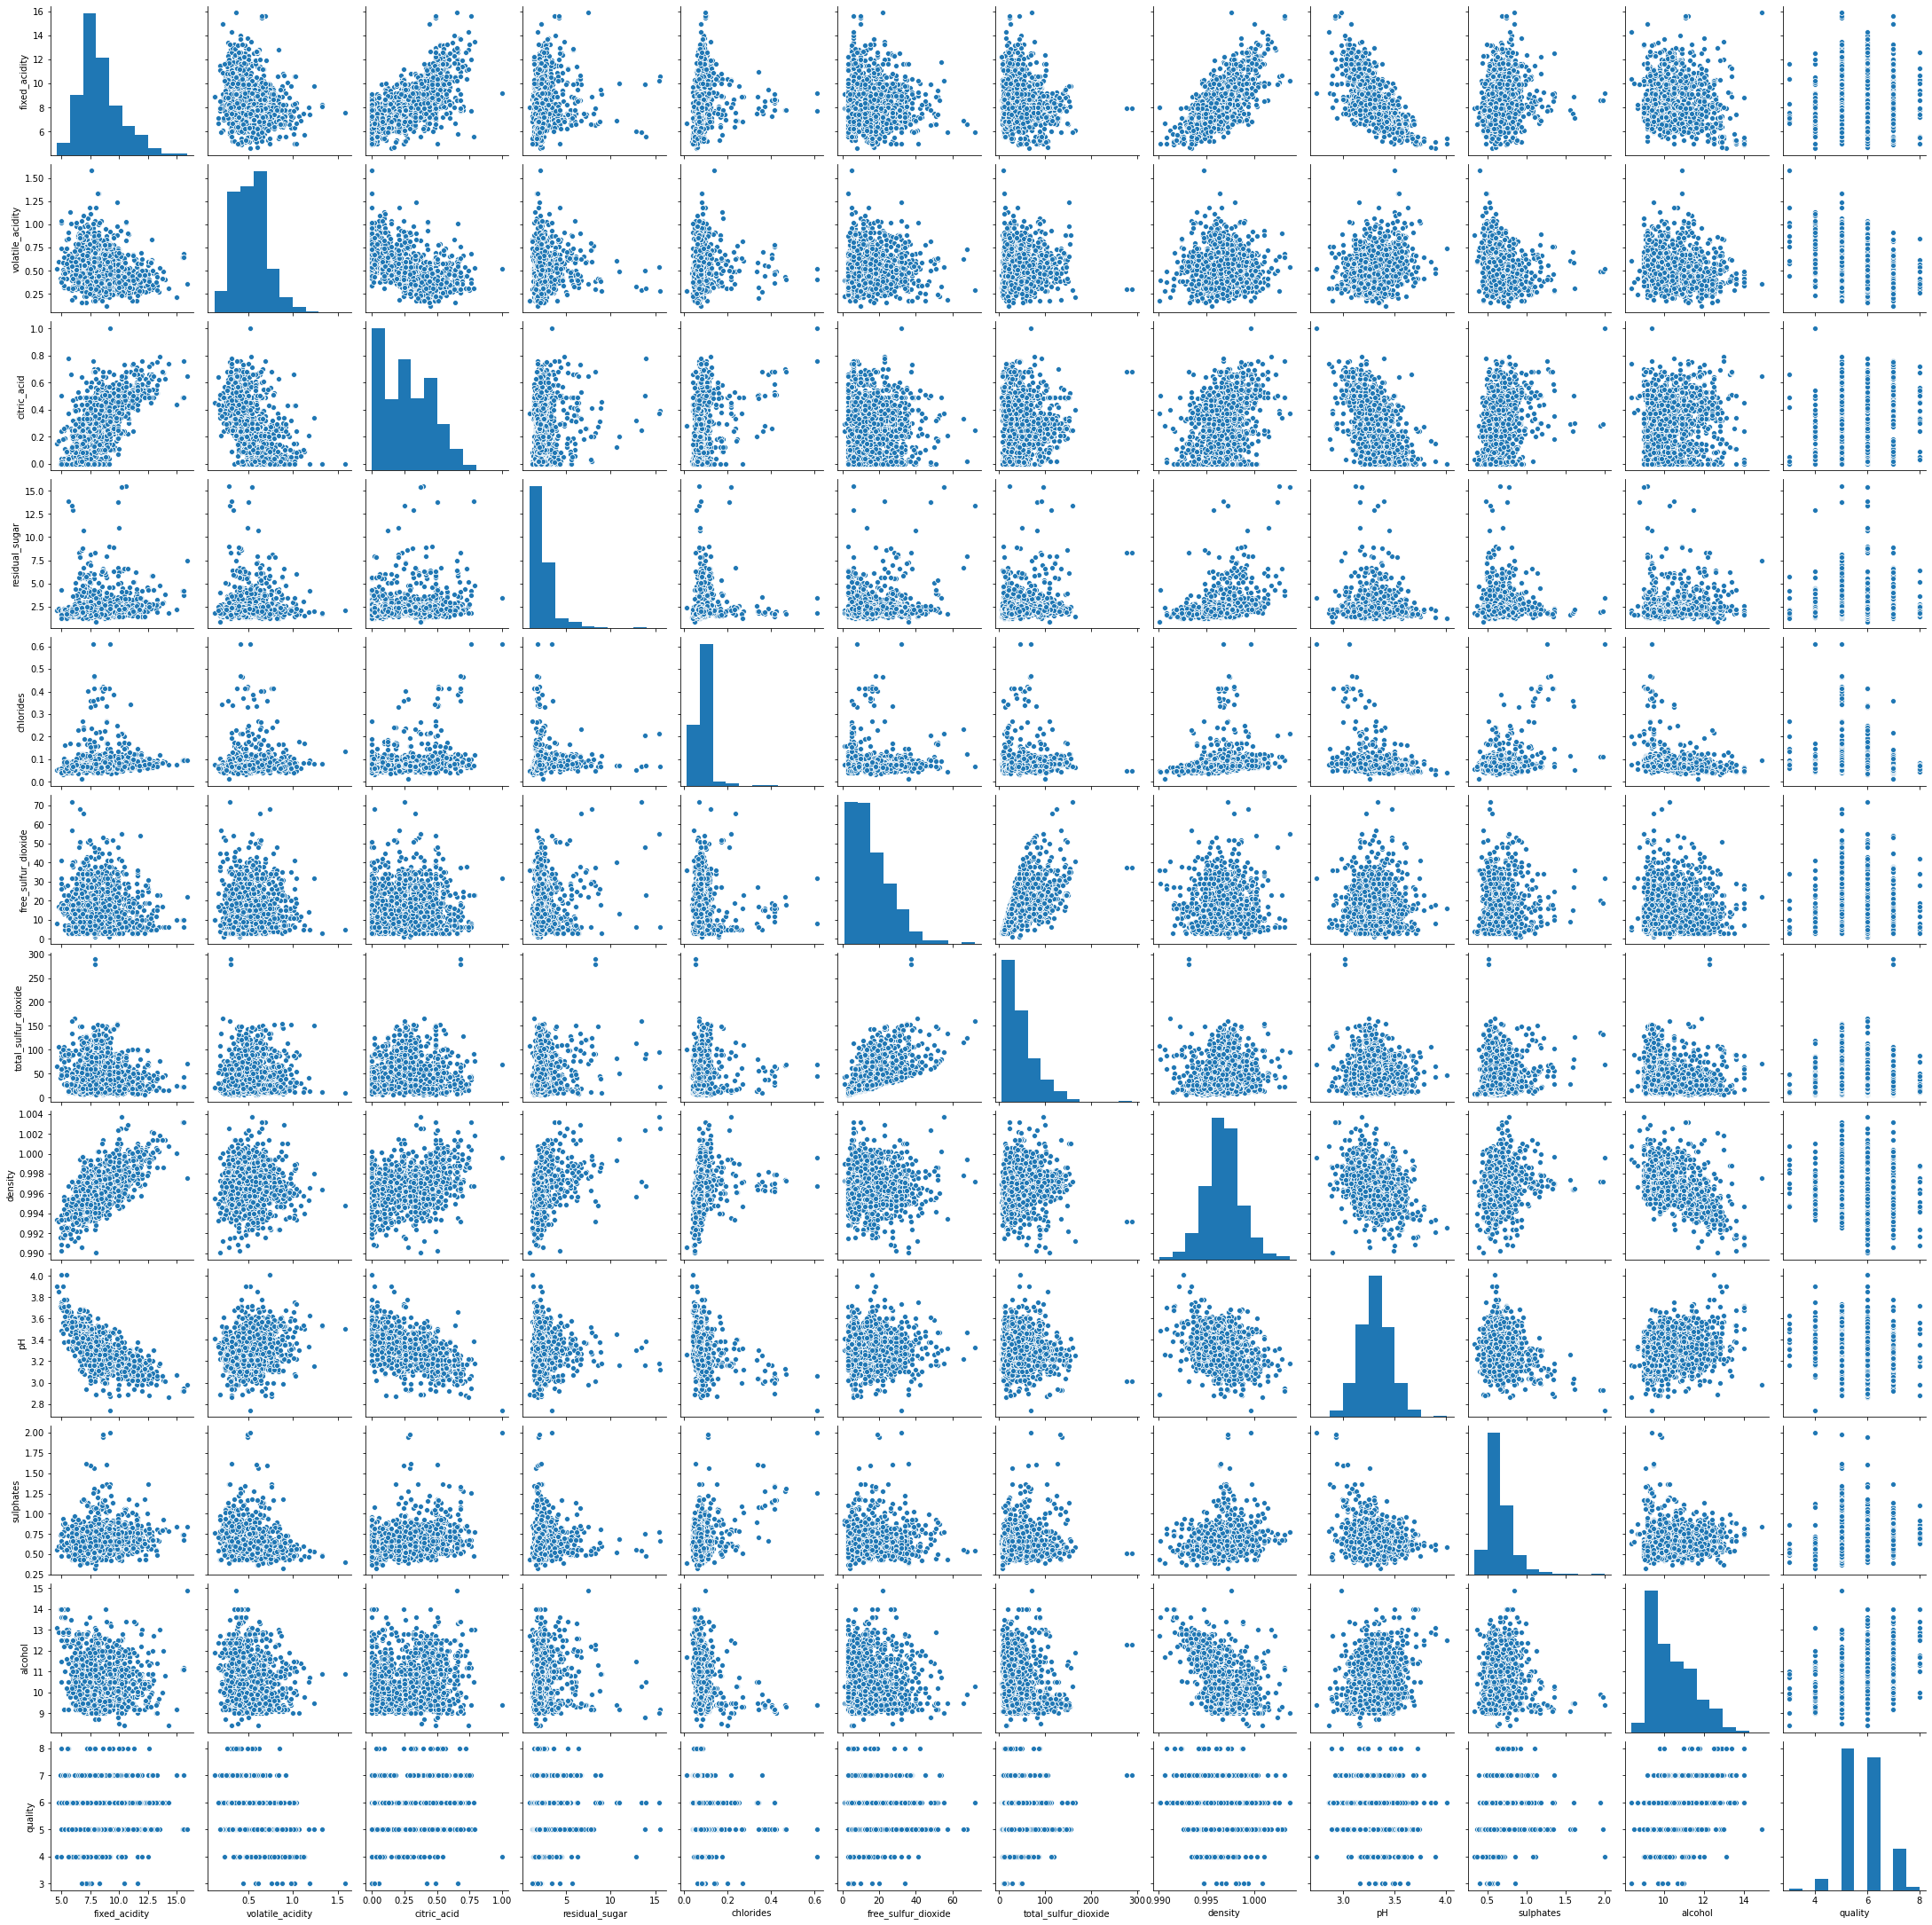

In [27]:
plt.figure(figsize=(16,12))
sns.pairplot(red_wine_data)
plt.show()